In [1]:
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result = pyreadr.read_r('.\RiverRd_hab.rds')

In [4]:
df = result[None]
df['Habitat'].value_counts()
# 1) PFO
# 2) PEM
# 3) NonWetland
# 4) Nonwetland Open
# 5) Water (E1UB)

1.0    40
2.0    34
4.0    25
5.0    21
3.0    15
Name: Habitat, dtype: int64

In [7]:
df['Wetland'] = np.where(np.logical_or(df['Habitat']==3.0, df['Habitat']==4.0), 0, 1)
df['Wetland'].value_counts()

1    95
0    40
Name: Wetland, dtype: int64

<AxesSubplot:>

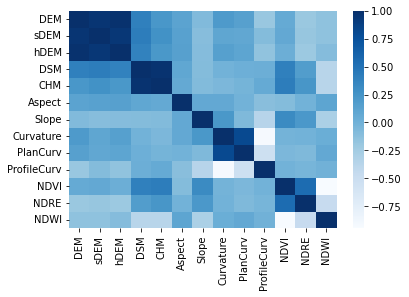

In [8]:
df_corr = df.drop(["Wetland", "Habitat", 'x', 'y'], axis=1)
corr = df_corr.corr()
sns.heatmap(corr, cmap="Blues")

In [9]:
wetland_corr = df.drop(['Habitat', 'x', 'y'], axis=1).corr()
df_corr = pd.DataFrame(wetland_corr['Wetland'])
df_corr = df_corr[:-1].sort_values(by=["Wetland"])
pd.set_option('display.max_rows', None)
df_corr

,Wetland
sDEM,-0.681447
DEM,-0.675254
hDEM,-0.660440
DSM,-0.296100
CHM,-0.184485
PlanCurv,-0.091422
ProfileCurv,-0.056602
Aspect,-0.051046
Curvature,-0.003203
NDVI,0.003468
